**강사: 멀티캠퍼스 강선구 (sunku0316.kang@multicampus.com)**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

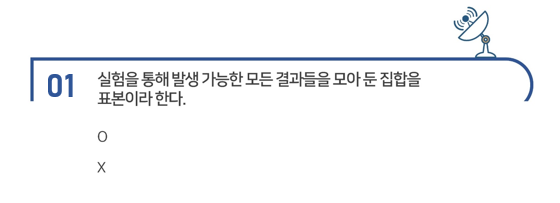

**X**

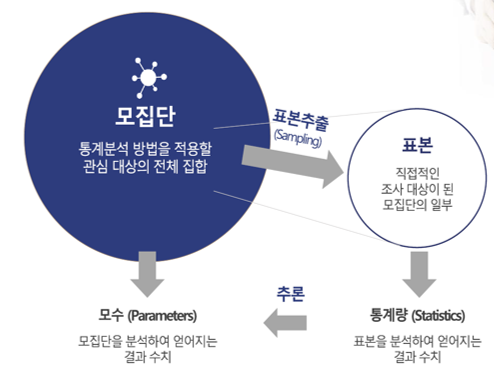

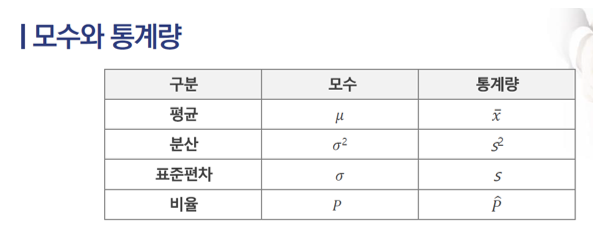

In [3]:
from scipy.stats import norm

In [4]:
# 모수의 정의
mu = 160
sigma = 25
# 주어진 분포에서 30개의 샘플을 가져옵니다.
X = norm.rvs(size=30, loc=mu, scale=sigma) # loc: 평균, scale: 표준편차
X

array([156.61434386, 173.99011331, 155.9556117 , 139.20680733,
       138.94095926, 126.27522975, 192.69589773, 162.88480458,
       158.97000964, 177.27163482, 140.94925426, 163.32068559,
       170.82235288, 185.92724026, 145.70319111, 191.2979802 ,
       175.61638046, 117.09815967, 120.58948102, 159.22463803,
       144.38900944, 172.74262911, 182.47592848, 136.21429084,
       174.35965975, 127.8241061 , 143.90440051, 141.00269427,
       151.56072592, 148.10851821])

In [5]:
# 통계량 측정
# 샘플의 평균
x_bar = np.mean(X)
x_bar

155.86455793663254

In [6]:
# 표본분산 (불편향분산)
s_2 = np.var(X, ddof=1) # 표본분산은 자유도를 1를 내립니다.
s_2
s = s_2 ** 0.5
s_2, s

(435.7580385700037, 20.87481828831101)

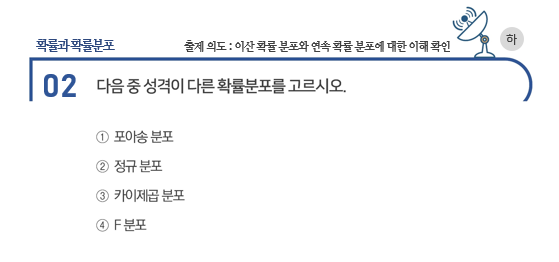

**이산 확률 분포 (Discrete Probability Distribution)**

|분포|특징|예|
|--|:--|:--|
|베르누이 분포|0,1로 결정되는 확률 변수에 대한 분포|성공 or 실패 <br/> True or False|
|이항 분포|0, 1로 결정되는 독립적인 사건이 n회 발생할 때 1이 k번 발생할 횟수|동전을 n번 던져서 k번 앞면일 확률|
|포아송 분포|단위 시공간에서 발생하는 사건 수<br/>구간 내 일정한 확률분포와 독립적인 사상 가정|초코칩 쿠키에 초코칩 수<br/>콜센터에서 한 시간 동안 걸려오는 전화수|


**연속 확률 분포 (Continuous Probability Distibution)**

|분포|특징|예|
|---|:---|:---|
|지수분포|다음 사건이 발생할 때까지의 대기시간.<br/>무기억성(이전 관측치가 이어지는 관측에 영향을 주지 않는다)| 다음 고객이 올 때까지의 대기시간|
|정규분포|좌우 대칭의 종모양<br/>대표본  모집단에 대한 추론|z검정<br/> 모분산을 알 경우의 신뢰구간|
|t분포|표준정규분포와 유사하지만 분산 대신에 자유도를 매개변수로 사용한다<br/>모집단이 정규 분포를 따른다고(정규성) 가정.<br/>모분산을 알지 못하는 소표본에 대한 추론|t 검정<br/>모분산을 모를 때의 신뢰구간|
|카이제곱분포|표준정규분포의 제곱한 값에 대한 분포|분산에 대한 추론, 카이제곱 검정|
|F 분포|두 개의 카이제곱분포의 비율|두 모집단의 분산 차이 비교시 사용, 분산분석, 회귀 분석|

**중심극한정리(Central Limit Theorem)**

독립 확률 변수 n개의 평균의 분포는 n 이 적당히 크다면 (보통 30~50 개 이상)  정규분포에 가까워 진다.

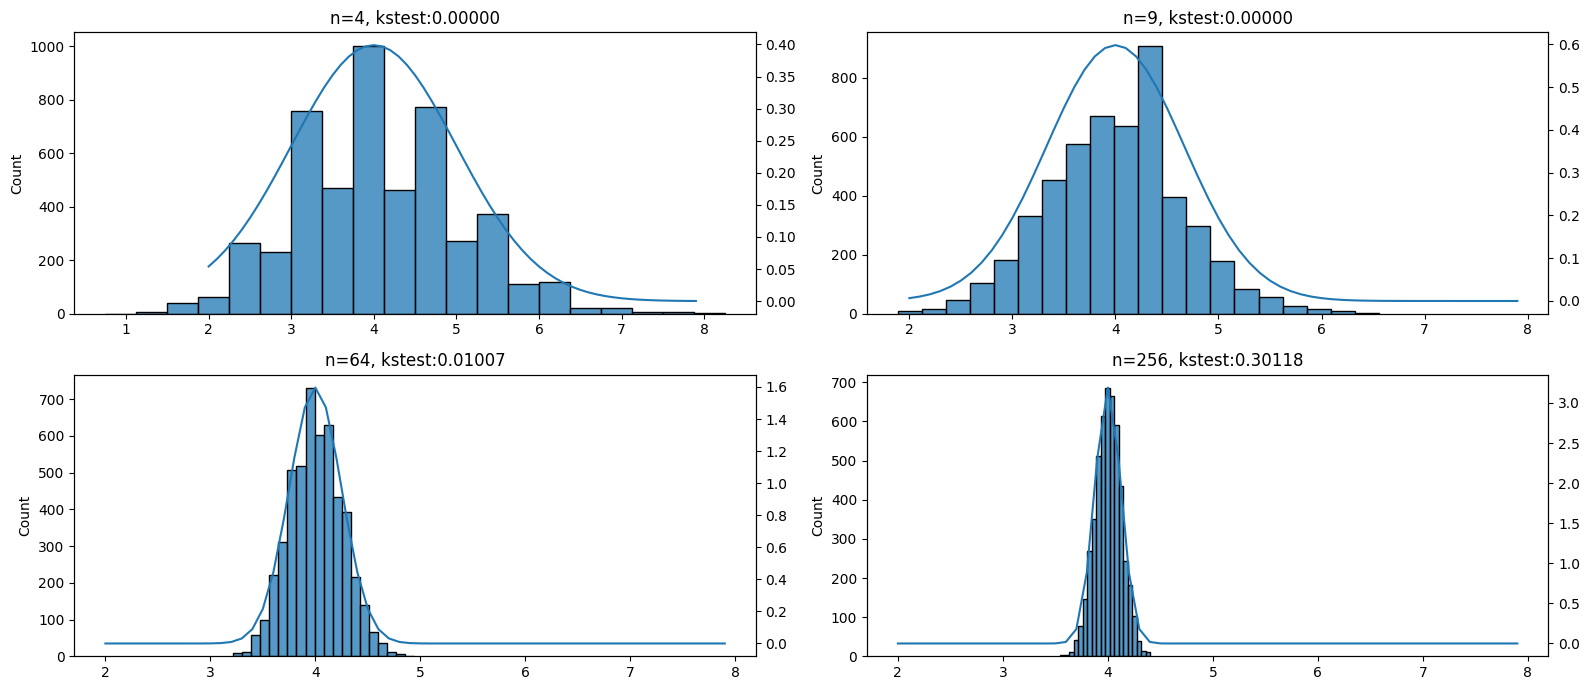

In [7]:
from scipy.stats import poisson, norm, kstest, zscore
mu = 4
sigma2 = 4

fig, axes = plt.subplots(2, 2, figsize=(16, 7))
# 샘플수를 4개, 9개, 64개, 256개로 합니다.
for i, ax in zip([4, 9, 64, 256], axes.ravel()):
    # 5000번 샘플링하여 각각의 평균을 구합니다.
    X_bars = [np.mean(poisson.rvs(size=i, mu=mu)) for _ in range(5000)]
    # 샘플 평균의 빈도수 그래프를 그립니다.
    sns.histplot(X_bars, bins=20, ax=ax)
    # 확률 밀도함수 출력합니다. 
    # 표본의 평균은 모평균과 같고, 분산은 모분산/샘플수 
    ax.twinx().plot(np.arange(2, 8, 0.1), norm.pdf(np.arange(2, 8, 0.1), loc=mu, scale=(sigma2 / i) ** 0.5))
    # 육안으로 확인하기 힘드니, kstest를 이용하여 정규 분포와 얼마나 유사한지 측정합니다.
    # kstest:1에 가까울 수록 정규분포에 가깝습니다.
    ax.set_title("n={}, kstest:{:.5f}".format(i, kstest(zscore(X_bars), norm.cdf).pvalue))
plt.tight_layout()
plt.show()

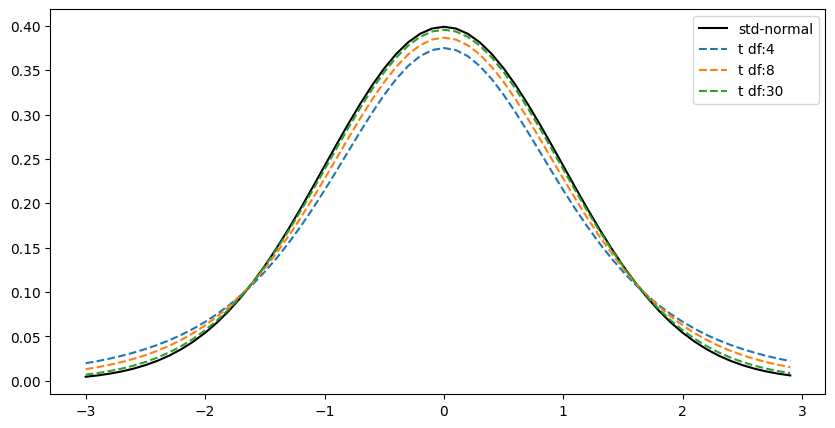

In [8]:
from scipy.stats import t, norm

mu = 4
sigma2 = 4

plt.figure(figsize=(10, 5))
x = np.arange(-3, 3, 0.1)
# 표준정규분포의 확률밀도함수를 출력합니다.
plt.plot(x, norm.pdf(x), label='std-normal', color='black')
# 자유도가 4, 8, 30 일 때의 t분포의 확률밀도함수를 출력합니다.
for i in [4, 8, 30]:
    plt.plot(x, t.pdf(x, df=i), label='t df:{}'.format(i), linestyle='--')
plt.legend()
plt.show()

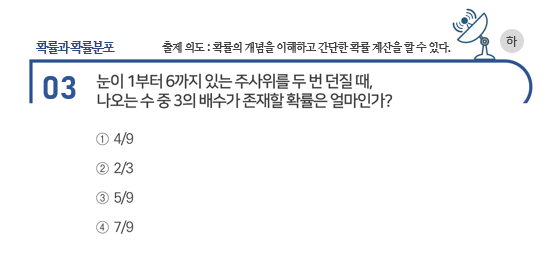

※ 두 주사위는 서로 독립적입니다. 

**3**

X1: 첫번째 주사위의 수

X2: 두번째 주사위의 수


**방법 1**


P(X1=3의배수)×P(X2=3의 배수) + P(X1=3의 배수)×P(X2≠3의배수)+P(X1≠3의 배수)×P(X2=3의배수)

= $\frac{1}{3}×\frac{1}{3} + \frac{1}{3}×\frac{2}{3} + \frac{2}{3}×\frac{1}{3}$
= $\frac{5}{9}$

**방법 2**

1 - P(X1≠3의 배수) × P(X2≠3의배수)

= $1 - \frac{2}{3}×\frac{2}{3}$
= $\frac{5}{9}$


**방법 3**


이항 분포의 확률:

$P(K=k)=C(n, k)p^k(1-p)^{n-k}$


$n=2, p = \frac{1}{3}$

$P(K=1) + P(K=2) = C(2, 1)\frac{1}{3}^1\frac{2}{3}^1 + C(2, 2)\frac{1}{3}^2\frac{2}{3}^0 = \frac{4}{9} + \frac{1}{9} = \frac{5}{9}$



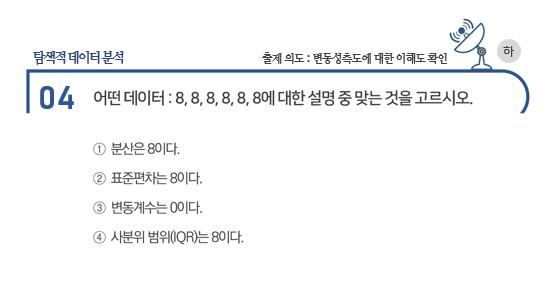

**3**

$\bar{x} = \frac{\sum_{i=1}^n{x}}{n}$

$s^2=\frac{\sum_{i=1}^n{(x - \bar{x})^2}}{n - 1}$

$s=\sqrt{\frac{\sum_{i=1}^n{(x - \bar{x})^2}}{n - 1}}$


$변동계수=\frac{\sigma}{\mu}≒\frac{s}{\bar{x}}$

$IQR = Q_3 - Q_1$, $Q_1: 1사분위수, Q_3: 3사분위수$


$\bar{x} = 0, s^2 = 0, s = 0, 변동계수 = 0, IQR = 0$

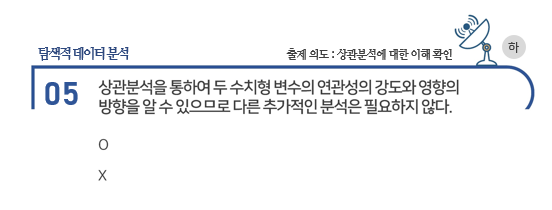

**X**

Pearson 상관계수는 두 연속형 변수의 선형적 상관도를 나타냅니다. 

따라서, 아래와 같이 선형적인 연관성이 아닌 경우에는 연관성의 강도를 제대로 표현하지 못합니다.

****

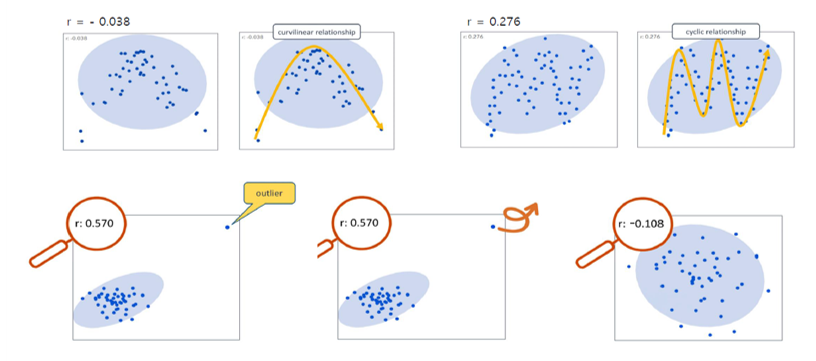

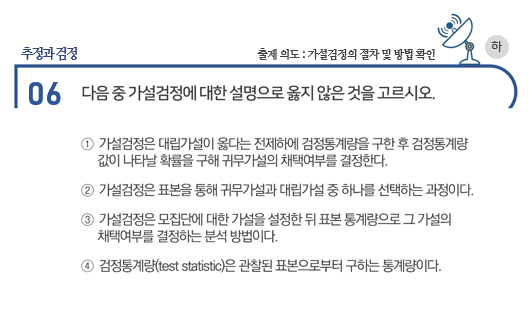

**1**

In [9]:
from scipy.stats import norm

# 평균: 30, 표준편차가 3인 정규분포에서 샘플 9개를 가져온다. 
# random_state = 123으로 고정시켜, 모든 경우에 동일한 값이 나오게한다..
X = norm.rvs(loc=30, scale=3, size=9, random_state=123)
X

array([26.74310819, 32.99203634, 30.84893549, 25.48111586, 28.26419924,
       34.95430961, 22.71996227, 28.71326211, 33.79780878])

예제) 

X의 모집단은 정규 분포를 따릅니다. 모분산을 알지 못한다고 할 때,


이를 통해서 아래 가설에 대한 검정을 합니다. 


$H_0$: X의 평균(모평균)은 30이다. 

$H_1$: X의 평균은 30이 아니다.

모분산을 알지 못하므로 t 분포를 사용합니다.

검정통계량

$T = \frac{(\bar{x}-\mu)}{s/\sqrt{n}} $

In [81]:
x_bar =  np.mean(X)
s = np.std(X, ddof=1) # 표본표준편차(불편향표준편차) 이므로 ddof를 1로 설정합니다.
x_bar, s

(1.9294261971083226, 2.9933724989352686)

In [11]:
n = 9
t_stat = (x_bar - 30) / (s / (n ** 0.5))
t_stat

-0.4467647978644454

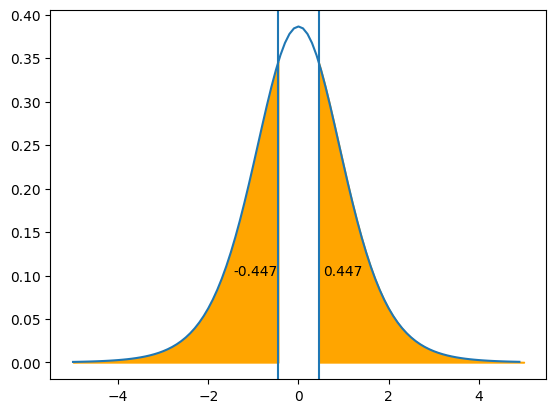

In [12]:
from scipy.stats import t

plt.plot(np.arange(-5, 5, 0.1), t.pdf(np.arange(-5, 5, 0.1), df=8))
plt.axvline(t_stat, 0, 1)
plt.text(t_stat - 1.0, 0.1, '{:0.3}'.format(t_stat))
x = np.linspace(-5, t_stat, 100)
plt.fill_between(x, np.zeros_like(x), t.pdf(x, df=8), color='orange')
plt.axvline(-t_stat, 0, 1)
plt.text(-t_stat + 0.1, 0.1, '{:0.3}'.format(-t_stat))
x = np.linspace(-t_stat, 5, 100)
plt.fill_between(x, np.zeros_like(x), t.pdf(x, df=8), color='orange')
plt.show()

In [13]:
#  위 그래프와 같이양측 검정이므로, pvalue는 양쪽 사이드의 면적이 됩니다.
pvalue = t.cdf(t_stat, df=8) * 2
pvalue

0.6668917378539887

In [14]:
from scipy.stats import ttest_1samp
ttest_1samp(X, 30)

Ttest_1sampResult(statistic=-0.4467647978644454, pvalue=0.6668917378539887)

예제) 

X의 모집단은 정규 분포를 따릅니다. 모분산이 9입니다.


이를 통해서 아래 가설에 대한 검정을 합니다. 


$H_0$: X의 평균(모평균)은 30이다. 

$H_1$: X의 평균은 30이 아니다.


모분산을 알고 있으니 정규분포를 사용합니다.

검정통계량

$z = \frac{(\bar{x}-\mu)}{\sigma/\sqrt{n}} $

In [15]:
n = 9
sigma2 = 9
sigma = sigma2 ** 0.5
z_stat = (x_bar - 30) / (sigma / (n ** 0.5))
z_stat

-0.609473566999398

In [16]:
from scipy.stats import norm
norm.cdf(z_stat) * 2

0.5422105882237214

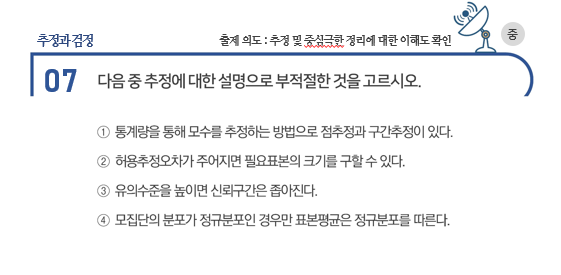

**4**

신뢰구간: 신뢰 수준: 표본에서 추정한 모집단의 구간이 사실일 확률

$ \bar{x} - c×\frac{s}{\sqrt{n}} \leq \mu \leq \bar{x} + c×\frac{s}{\sqrt{n}}$


$n =  샘플의 수$

$alpha = 신뢰 수준 + \frac{(1 - 신뢰 수준)}{2}$ 

Ex) 신뢰수준이 95%이면 alpha=0.975

모분산을 모를 경우에 t 분포를 사용하여 c를 계산

$c = T_{df=n-1}(alpha)$ T는 t분포의 누적확률함수의 역함수

모분산을 알고 있을 경우 z 분포를 사용하여 c를 계산

$c = Z(alpha)$ Z는 표준정규분포의 누적확률함수의 역함수

$오차=2×c×\frac{s}{\sqrt{n}}$

In [17]:
from scipy.stats import norm

# 평균: 10, 표준편차가 4인 정규분포에서 샘플 12개를 가져옵니다.
# random_state = 123으로 고정시켜, 모든 경우에 동일한 값이 나오게한다..
X = norm.rvs(loc=10, scale=4, size=12, random_state=123)
X

array([ 5.65747759, 13.98938179, 11.13191399,  3.97482114,  7.68559899,
       16.60574615,  0.29328303,  8.28434948, 15.06374503,  6.53303839,
        7.28445539,  9.62116412])

위 관측값에서 신뢰 수준이 95%인 모평균의 신뢰구간을 구하세요. (모분산은 모른다고 가정합니다.)


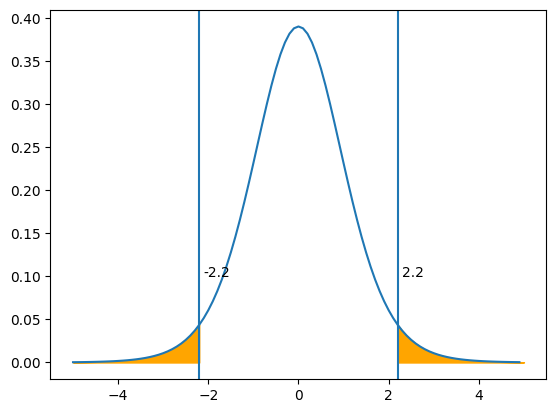

In [18]:
x_bar = np.mean(X)
s2 = np.var(X, ddof=1)
s = s2 ** 0.5

from scipy.stats import t

alpha = 0.95 + (1 - 0.95) / 2 # 0.975
c = t.ppf(alpha, df=11)

plt.plot(np.arange(-5, 5, 0.1), t.pdf(np.arange(-5, 5, 0.1), df=11))
plt.axvline(c, 0, 1)
plt.text(c + 0.1, 0.1, '{:0.3}'.format(c))

x = np.linspace(-5, -c, 100)
plt.fill_between(x, np.zeros_like(x), t.pdf(x, df=11), color='orange')
plt.axvline(-c, 0, 1)
plt.text(-c + 0.1, 0.1, '{:0.3}'.format(-c))
x = np.linspace(c, 5, 100)
plt.fill_between(x, np.zeros_like(x), t.pdf(x, df=11), color='orange')
plt.show()

오랜지색의 영역이 0.05(5%), 즉 구간에서 벗어날 확률이 5%인 두 지점을 구한겁니다.

In [19]:
n = 12
left, right = x_bar - c * s / (n ** 0.5), x_bar + c * s / (n ** 0.5)
left, right

(5.829018840021323, 11.85847701076386)

In [20]:
correct_cnt = 0
for _ in range(1000):
    X_test = norm.rvs(loc=10, scale=4, size=12)
    x_bar = np.mean(X_test)
    if x_bar > left and x_bar < right:
        correct_cnt += 1
correct_cnt / 1000

0.945

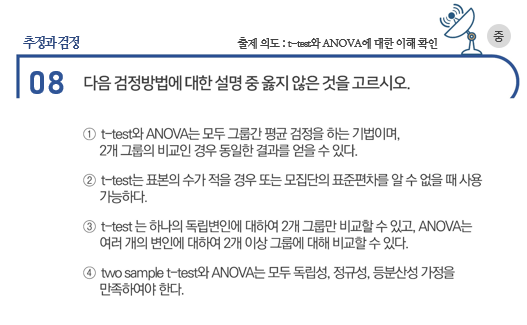

※ (1) 두집단의 분산이 같다면,

**4**

In [21]:
from scipy.stats import norm

# 평균: 30, 표준편차가 3인 정규분포에서 샘플 9개를 가져온다. 
# random_state = 123으로 고정시켜, 모든 경우에 동일한 값이 나오게한다.
X1 = norm.rvs(loc=30, scale=3, size=9, random_state=123)

# 평균: 31, 표준편차가 3인 정규분포에서 샘플 9개를 가져온다. 
# random_state = 12으로 고정시켜, 모든 경우에 동일한 값이 나오게한다.
X2 = norm.rvs(loc=31, scale=3, size=9, random_state=12)

In [22]:
# t-test 독립성 검정 
from scipy.stats import ttest_ind
ttest_ind(X1, X2, equal_var=False), ttest_ind(X1, X2, equal_var=True)

(Ttest_indResult(statistic=-0.3010213578851161, pvalue=0.767976461980855),
 Ttest_indResult(statistic=-0.3010213578851161, pvalue=0.7672748465817498))

In [23]:
# 분산분석
from scipy.stats import f_oneway
f_oneway(X1, X2)

F_onewayResult(statistic=0.09061385790299765, pvalue=0.7672748465817516)

In [24]:
# 평균: 30, 표준편차가 3인 정규분포에서 샘플 9개를 가져온다. 
# random_state = 123으로 고정시켜, 모든 경우에 동일한 값이 나오게한다..
X1 = norm.rvs(loc=30, scale=3, size=9, random_state=123)
# 평균: 31, 표준편차가 4인 정규분포에서 샘플 16개를 가져온다. 
# random_state = 123으로 고정시켜, 모든 경우에 동일한 값이 나오게한다..
X2 = norm.rvs(loc=31, scale=4, size=16, random_state=12)

In [25]:
ttest_ind(X1, X2, equal_var=False), ttest_ind(X1, X2, equal_var=True)

(Ttest_indResult(statistic=-0.9618815079273741, pvalue=0.34838182545188456),
 Ttest_indResult(statistic=-0.9251573452634293, pvalue=0.3644899178901534))

In [26]:
f_oneway(X1, X2)

F_onewayResult(statistic=0.8559161134948712, pvalue=0.3644899178901547)

In [27]:
# 분산분석의 가정은 범주간에 표본들은 등분산이고 정규분포를 따른다

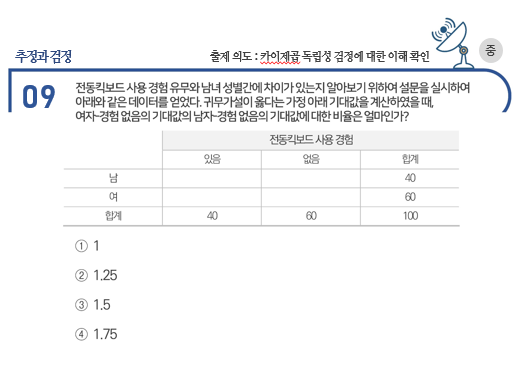

※ 카이제곱검정의 귀무가설이 옳다

**3**

카이 제곱 검정:

$H_0$: 두 범주의 분포는 같다. <=>  두 범주의 비율은 같다. <=> 두 범주는 독립이다.

$H_1$: 두 범주의 분포는 같지 않다. <=>  두 범주의 비율은 같지않다. <=> 두 범주는 독립이 아니다.


In [28]:
60/40

1.5

In [50]:
df_exam

,name,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,m
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS
...,...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865,L
246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985,L
247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625,m
248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385,m


**Chi-Square 검정의 예**

$H_0$: 성별(gender)와 혈액형(blood_type)은 독립이다.

$H_1$: 성별(gender)와 혈액형(boold_type)은 독립이 아니다. 

In [55]:
# 빈도수 테이블
# 방법1: pivot_table with aggfunc='size'
df_conti = df_exam.pivot_table(index='gender', columns='blood_type', aggfunc='size')
df_conti

blood_type,A,AB,B,O
gender,,,,
F,34,12,31,35
M,50,17,23,48


In [56]:
# 방법2: pd.crosstab
df_conti = pd.crosstab(index=df_exam['gender'], columns=df_exam['blood_type'])
df_conti

blood_type,A,AB,B,O
gender,,,,
F,34,12,31,35
M,50,17,23,48


In [72]:
df_expected = df_exam['gender'].value_counts(normalize=True).rename('freq').to_frame().dot(
    df_exam['blood_type'].value_counts().rename('freq').to_frame().T
)
df_expected

,A,O,B,AB
M,46.368,45.816,29.808,16.008
F,37.632,37.184,24.192,12.992


$Chi2 = \sum_{i, j}{\frac{(O_{i,j} - E_{i,j})}{E_{i,j}}}$

In [74]:
chi2_stats = ((df_conti - df_expected) ** 2 / df_expected).sum().sum()
chi2_stats

4.47542396220999

In [77]:
df= (df_conti.shape[0] - 1) * (df_conti.shape[1] - 1)
from scipy.stats import chi2
1 - chi2.cdf(chi2_stats, df=df)

0.21449291722925723

In [78]:
from scipy.stats import chi2_contingency
chi2_contingency(df_conti)

(4.475423962209989,
 0.21449291722925645,
 3,
 array([[37.632, 12.992, 24.192, 37.184],
        [46.368, 16.008, 29.808, 45.816]]))

**2 표집 T검정의 예**

$H_0$: 남성(gender=M)과 여성(gender=F)의 expenditure의 평균은 같다.(독립이다.)

$H_1$: 남성(gender=M)과 여성(gender=F)의 expenditure의 평균은 같지 않다.(독립이다.)

조건 1: 남성(gender=M), 여성(gender=F) 각각의 표집내에서 정규분포를 따른 다고 가정한다.

조건 2: 남성(gender=M)과 여성(gender=F)에서 expenditure의 분산을 같다.

In [80]:
from scipy.stats import ttest_ind

ttest_ind(
    df_exam.loc[df_exam['gender'] == 'M', 'expenditure'],
    df_exam.loc[df_exam['gender'] == 'F', 'expenditure'],
    equal_var=True # 분산이 같다.
)

Ttest_indResult(statistic=1.6488495275564492, pvalue=0.1004446032726399)

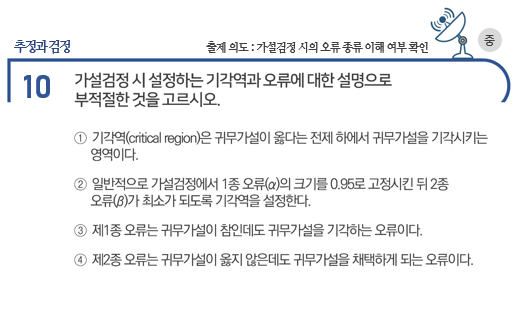

**2**

제 1종 오류: False Positive

제 2종 오류: False Negative


True의 의미: 올바른

False의 의미: 잘못된

Negative: $H_0$ - 귀무가설

Positive: $H_1$ - 대립가설

False Positive: Positive 라고 결론을 내린 것이 잘못됨 => 참: Negative

False Negative: Negative 라고 결론을 내린 것이 잘못됨 => 참: Positive


보통 유의 수준 0.05(5%)로 잡는다.

유의 수준: 귀무 가설을 기각할 때 오류의 상한선

pvalue: 증거(관측치)로 판단했을 때 귀무가설을 기각한 것이 오류인 확률

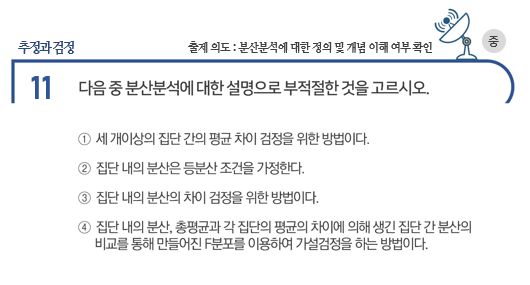

**3**

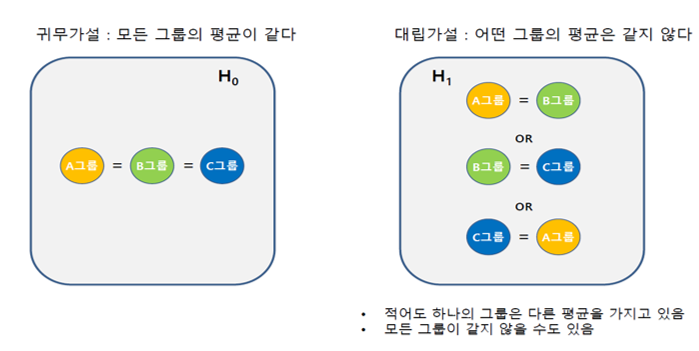

In [29]:
# 평균: 30, 표준편차가 3인 정규분포에서 샘플 30개를 가져온다. 
# random_state = 123으로 고정시켜, 모든 경우에 동일한 값이 나오게한다..
X1 = norm.rvs(loc=30, scale=3, size=30, random_state=123)

# 평균: 31, 표준편차가 3인 정규분포에서 샘플 40개를 가져온다. 
# random_state = 123으로 고정시켜, 모든 경우에 동일한 값이 나오게한다..
X2 = norm.rvs(loc=31, scale=3, size=40, random_state=12)

# 평균: 31, 표준편차가 3인 정규분포에서 샘플 30개를 가져온다. 
# random_state = 123으로 고정시켜, 모든 경우에 동일한 값이 나오게한다..
X3 = norm.rvs(loc=32, scale=3, size=16, random_state=1234)

In [30]:
from scipy.stats import f_oneway
f_oneway(X1, X2, X3)

F_onewayResult(statistic=1.6676736297342163, pvalue=0.19494507434141878)

In [31]:
# X1, X2, X3 샘플이 속한 집단을 categ로 나타내고, 이를 합칩니다.
df_anova = pd.concat([
    pd.DataFrame(X1, columns=['value']).assign(categ='X1'),
    pd.DataFrame(X2, columns=['value']).assign(categ='X2'),
    pd.DataFrame(X3, columns=['value']).assign(categ='X3')
])
# 범주별로 3개씩만 뽑아 확인합니다.
df_anova.groupby('categ').head(3)

,value,categ
0,26.743108,X1
1,32.992036,X1
2,30.848935,X1
0,32.418957,X2
1,28.955722,X2
2,31.727318,X2
0,33.414305,X3
1,28.427073,X3
2,36.298121,X3


In [32]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
lm = ols('value ~ categ', data=df_anova).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
categ,2.0,37.186178,18.593089,1.667674,0.194945
Residual,83.0,925.376745,11.149117,NaN,NaN


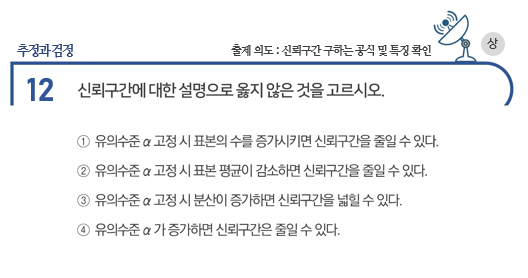

**2**

신뢰구간: 신뢰 수준: 표본에서 추정한 모집단의 구간이 사실일 확률

$ \bar{x} - c×\frac{s}{\sqrt{n}} \leq \mu \leq \bar{x} + c×\frac{s}{\sqrt{n}}$

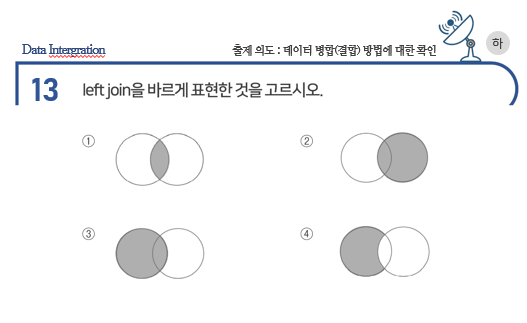

**3**

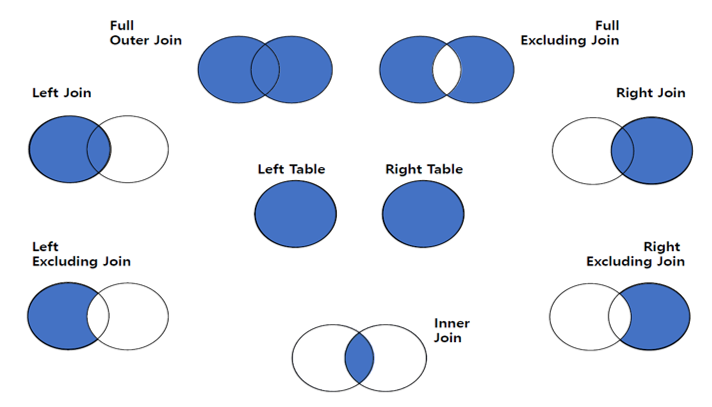

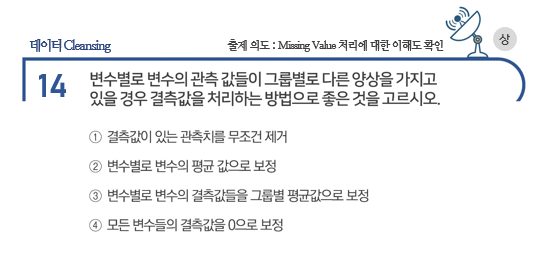

**3**

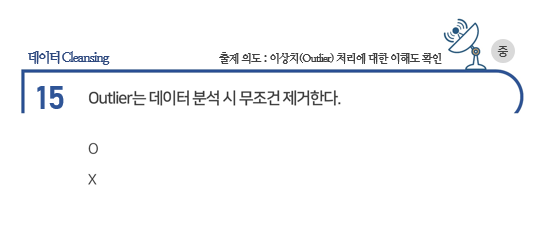

**X**

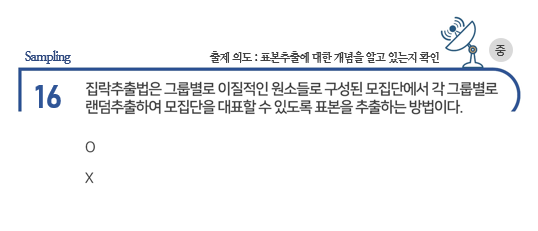

**X**

*표본추출법*

추출 방법에 따라

|방법|설명|
|----|:---|
|단순임의추출법(simple random sampling)|무작위로 표본을 추출|
|계통추출법(systematic sampling)|대상의 순서에 따라 일정 간격을 두고 샘플을 추출|
|층화 추출법(stratified random sampling)|대상집단을 성질이 다른 그룹(Ex, 성별/연령별)으로 나누고, 동일 그룹에서 추출|
|집락 추출법|대상집단을 성질이 동일한 그룹(학교에서 동일학급 1반/2반/3반, ..)으로 나누고, 집락 단위로 추출|

집락은 모집단을 축소판

In [33]:
# 이후 문제에서 사용할 예제
df_exam = pd.read_csv('dataset_v4.csv')
df_exam.head()

,name,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,m
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS


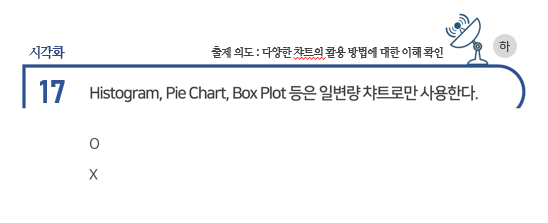

**X**

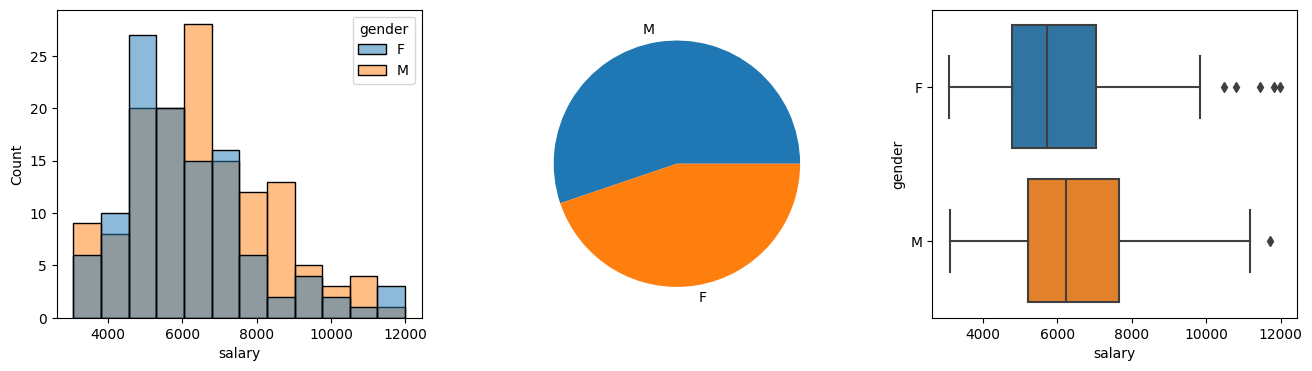

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
sns.histplot(data=df_exam, x='salary', hue='gender', ax=axes[0])
df_exam['gender'].value_counts().pipe(lambda x: axes[1].pie(x.values, labels=x.index))
sns.boxplot(data=df_exam, x='salary', y='gender', ax= axes[2])
plt.show()

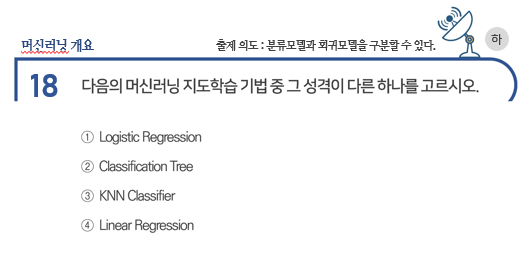

**4**

**Logit/Logistic**


$logit(p) = \log(\frac{p}{1-p})$

확률 0에서 1사의 영역을 실수 전체로 변환 즉 \[0, 1\] → \[-∞, ∞\]

이런 변환을 해주는 함수를 logit 함수입니다.

이렇게 하여 이진 분류를 위한 확률의 문제를 회귀의 문제로 바꾸어 생각할 수 있게 된 겁니다. 

이렇게 대상 변수를 회귀의 문제로 바꾸어주는 함수를 Link 함수라고 합니다. 

이런 원리로 Logistic Regression은 선형회귀(Linear Regression)을 0, 1을 맞추는데 사용하도록 한 겁니다.

Logistic 함수 Logit의 역함수

$logistic(x) = \frac{1}{1+e^{-x}}$

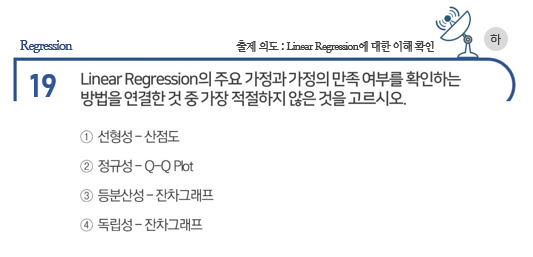

**4**

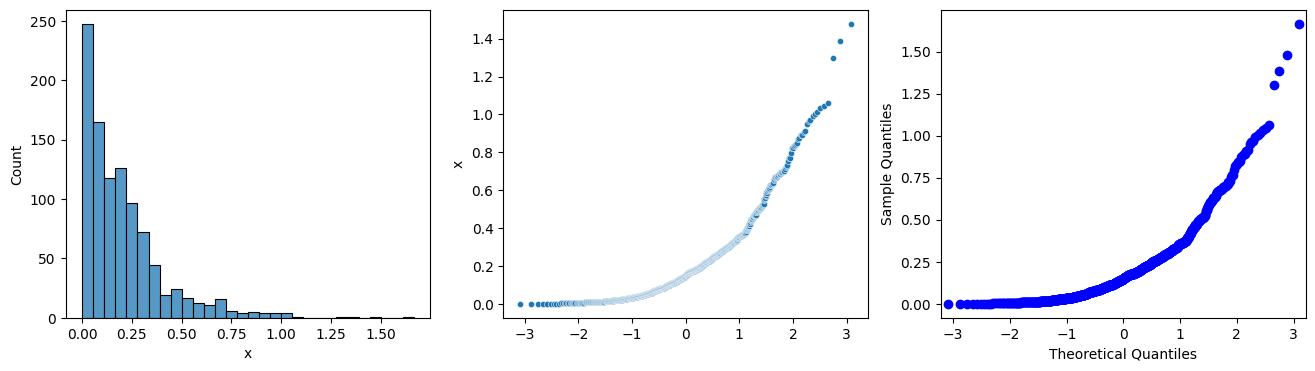

In [35]:
from scipy.stats import expon, norm
from statsmodels.graphics.gofplots import qqplot

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

lambda_ = 5 # lambda 
n = 1000 # 샘플수

# 지수분포에서, lambda를 lambda_로 해서 n개의 표본을 뽑아온다.
X = expon.rvs(size=n, scale=1/lambda_) # expon 함수의 scale은 1/lambda 입니다.
sns.histplot(X, bins=30, ax=axes[0])
axes[0].set_xlabel('x')
sns.scatterplot(
    x=norm.ppf(np.linspace(0, 1, n)), 
    y=np.sort(X), ax=axes[1], s=20
) # y는 샘플을 정렬, x는 퍼센틸에 대응하는 표준정규분포의 입력을 출력, y는 표본
axes[1].set_ylabel("x")
qqplot(X, ax=axes[2]) # statsmodels의 qqplot
plt.show()

In [36]:
from scipy.stats import skew
skew(X)

2.17186277858176

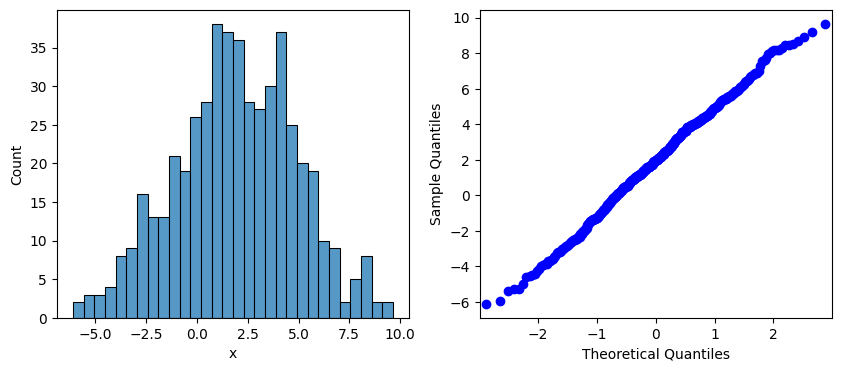

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

mu = 2
std = 3
n = 1000 # 샘플수

# 평균이 mu, 표준편차를 std인 정규 분포에서 n개의 샘플을 뽑아 옵니다.
X = norm.rvs(size=500, loc=mu, scale=std)
sns.histplot(X, bins=30, ax=axes[0])
axes[0].set_xlabel('x')
qqplot(X, ax=axes[1]) # statsmodels의 qqplot
plt.show()

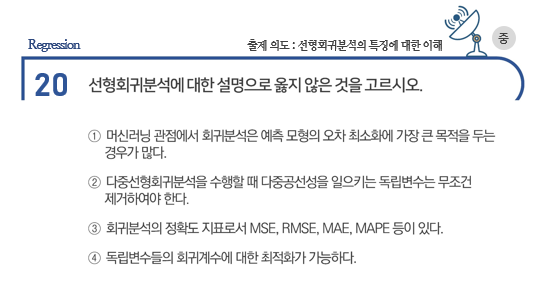

In [41]:
df_exam

,name,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,m
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS
...,...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865,L
246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985,L
247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625,m
248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385,m


In [42]:
# statsmodels를 통한 통계적 관점에서의 선형회귀 분석
from statsmodels.formula.api import ols
# 종속변수: expenditure, 독립변수: salary, age, gender(범주형), blood_type(범주형), grades(범주형)
lm = ols('expenditure ~ salary + age + C(gender) + C(blood_type) + C(company) + C(grades)', data=df_exam).fit()
# 분석의 요약을 출력합니다.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1050.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          7.20e-198
Time:                        10:17:58   Log-Likelihood:                -1737.5
No. Observations:                 250   AIC:                             3501.
Df Residuals:                     237   BIC:                             3547.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2111.4182    109.215    -19.333      0.000   -2326.574   -1896.263
C(gender)[T.M]        -47.3936     34.934     -1.357      0.176    -116.214      21.427
C(blood_type)[T.AB]    -2.9111     56.156     -0.052      0.959    -113.539     107.717
C(blood_type)[T.B]     14.6525     45.866      0.319      0.750     -75.706     105.010
C(blood_type)[T.O]    -15.4317     40.243     -0.383      0.702     -94.712      63.848
C(company)[T.B]       222.3223     38.742      5.738      0.000     145.999     298.646
C(company)[T.C]       148.8871     93.552      1.591      0.113     -35.413     333.187
C(grades)[T.B]        348.3730     37.999      9.168      0.000     273.515     423.231
C(grades)[T.C]        758.1091     55.088     13.762      0.000     649.584     866.635
C(grades)[T.D]        992.8681     71.856     13.818      0.000     851.311    1134.425
C(grades)[T.F]       1267.3598    103.215     12.279      0.000    1064.023    1470.696
salary                  0.9583      0.022     43.523      0.000       0.915       1.002
age                    13.8188      4.510      3.064      0.002       4.933      22.704
==============================================================================
Omnibus:                      115.137   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.644
Skew:                          -0.027   Prob(JB):                     0.000661
Kurtosis:                       1.816   Cond. No.                     5.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# Machine Learning 관점에서의 선형회귀

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mape(y, y_hat):
    return np.mean(np.abs(y - y_hat) / y) * 100

# 검증을 위해 학습셋과 검증셋으로 구분합니다.
df_train, df_test = train_test_split(df_exam, train_size=0.8, random_state=123, shuffle=True)

# salary, age StandardScaler / 'gender', 'blood_type', 'company', 'grades' OneHotEncoder
# ColumnTransformer를 통해 컬럼별 전처리 루틴을 설정합니다.
ct = ColumnTransformer([
    ('std', StandardScaler(), ['salary', 'age']),
    ('ohe', OneHotEncoder(drop='first'), ['gender', 'blood_type', 'company', 'grades'])
])
X_lr = ['salary', 'age', 'gender', 'blood_type', 'company', 'grades']
# 전처리 과정과 LinearRegression을 통합합니다.
reg_lr = make_pipeline(ct, LinearRegression())
reg_lr.fit(df_train[X_lr], df_train['expenditure'])

# Train에 대한 예측 결과
prd_train = reg_lr.predict(df_train[X_lr])
# Test에 대한 예측 결과
prd_test = reg_lr.predict(df_test[X_lr])

# 성능을 측정합니다.
df_perform = pd.DataFrame([
    [
        mean_squared_error(df_train['expenditure'], prd_train),
        mean_absolute_error(df_train['expenditure'], prd_train),
        r2_score(df_train['expenditure'], prd_train),
        mape(df_train['expenditure'], prd_train)
    ],
    [
        mean_squared_error(df_test['expenditure'], prd_test),
        mean_absolute_error(df_test['expenditure'], prd_test),
        r2_score(df_test['expenditure'], prd_test),
        mape(df_test['expenditure'], prd_test)
    ]], 
columns=['mse', 'mae', 'r2', 'mape'], index=['train', 'test']).assign(
    rmse = lambda x: x['mse'] ** 0.5
)
df_perform

,mse,mae,r2,mape,rmse
train,62756.197229,219.590107,0.982499,5.379046,250.51187
test,71873.004208,234.737602,0.974295,5.045131,268.09141


**2**

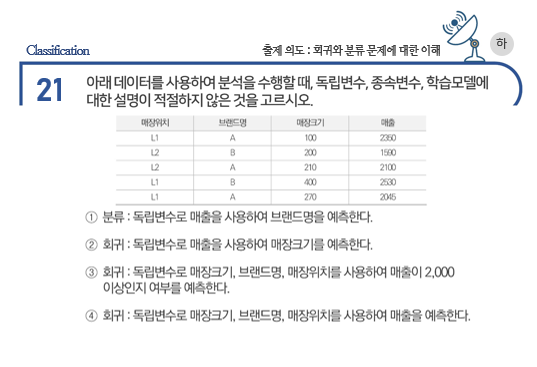

**3**

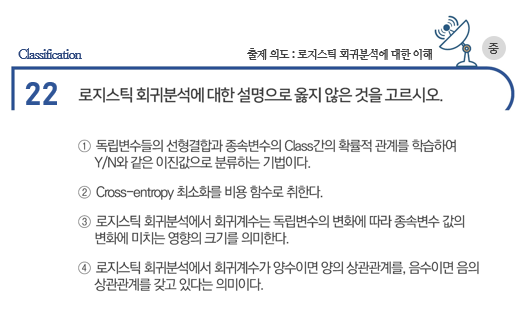

**3**

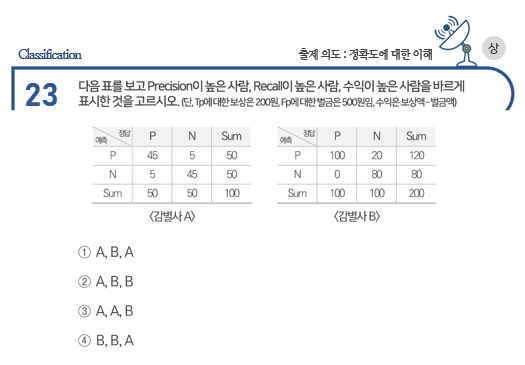

**2**


|예측 결과|의미|
|---|---|
|TP(True Positive)|Positive 예측이 맞음|
|TN(True Negative)|Negative 예측이 맞음|
|FP(False Postivie)|Positive 예측이 틀림|
|FN(False Negative)|Negative 예측이 틀림|

$Precision=\frac{TP}{TP + FP}$ : Positive 예측한 경우 중에 맞은 비율

$Recall=\frac{TP}{TP+FN}$: Positive 중에서 맞은 예측의 비율



*감별사A*

$Precision=\frac{45}{45 + 5} = 0.9$

$Recall=\frac{45}{45 + 5}=0.9$

$수익=200*45 - 500 * 5=5000 - 2500=2500$

*감별사 B*

$Precision=\frac{100}{100 + 20} = 0.83..$

$Recall=\frac{100}{100}=1.0$

$수익=200*100 - 500 * 20=20000 - 10000=10000$

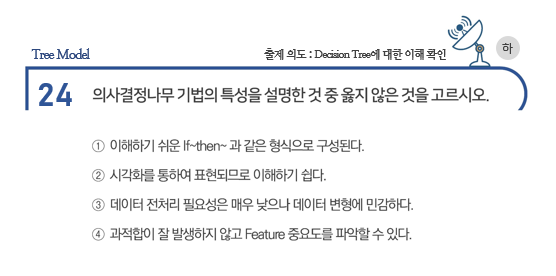

**4**

**Decision Tree 예제**

입력 변수: height', 'age', 'salary', 'expenditure'

대상 변수: car_type 이 'L'이면  True 아니면 False

DecisionTreeClassifier 모델 만들고, accuracy로 성능 측정해 봅니다.

In [44]:
df_exam['car_type'].value_counts()

m     148
L      79
S      21
SS      2
Name: car_type, dtype: int64

In [45]:
(df_exam['car_type'] == 'L').value_counts()

False    171
True      79
Name: car_type, dtype: int64

In [46]:
from sklearn.tree import DecisionTreeClassifier

X = ['height', 'age', 'salary', 'expenditure']

clf_dt = DecisionTreeClassifier()
clf_dt.fit(df_exam[X], df_exam['car_type'] == 'L')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(df_exam['car_type'] == 'L', clf_dt.predict(df_exam[X]))

1.0

In [48]:
from sklearn.model_selection import train_test_split

# 학습을 80%, 테스트를 20%로 해서 car_type으로 층화 분리  합니다.
df_train, df_test = train_test_split(df_exam, train_size=0.8, stratify=df_exam['car_type'])
clf_dt = DecisionTreeClassifier(random_state=123)
clf_dt.fit(df_train[X], df_train['car_type'] == 'L')
(
    accuracy_score(df_train['car_type'] == 'L', clf_dt.predict(df_train[X])),
    accuracy_score(df_test['car_type'] == 'L', clf_dt.predict(df_test[X]))
)

(1.0, 0.74)

In [49]:
train_score = []
test_score = []

for i in range(2, 11):
    clf_dt = DecisionTreeClassifier(max_depth=i, random_state=123)
    clf_dt.fit(df_train[X], df_train['car_type'] == 'L')
    train_score.append(
        accuracy_score(df_train['car_type'] == 'L', clf_dt.predict(df_train[X]))
    )
    test_score.append(
        accuracy_score(df_test['car_type'] == 'L', clf_dt.predict(df_test[X]))
    )
    
train_score, test_score

([0.735, 0.77, 0.845, 0.885, 0.915, 0.97, 0.975, 0.995, 1.0],
 [0.66, 0.66, 0.68, 0.62, 0.66, 0.74, 0.74, 0.72, 0.74])

In [50]:
(df_train['car_type'] == 'L').value_counts(normalize=True)

False    0.685
True     0.315
Name: car_type, dtype: float64

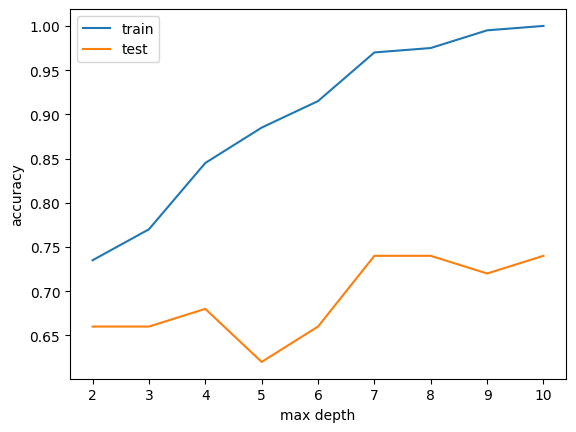

In [51]:
df_scores = pd.DataFrame([train_score, test_score], index=['train', 'test']).T
df_scores.sort_values('train', inplace=True)

plt.plot(np.arange(2, 11), df_scores['train'], label='train')
plt.plot(np.arange(2, 11), df_scores['test'], label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

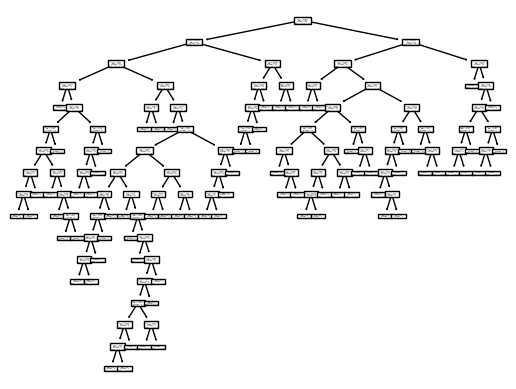

In [52]:
from sklearn.tree import plot_tree

clf_dt = DecisionTreeClassifier()
clf_dt.fit(df_exam[X], df_exam['car_type'])

plot_tree(clf_dt)
plt.show()

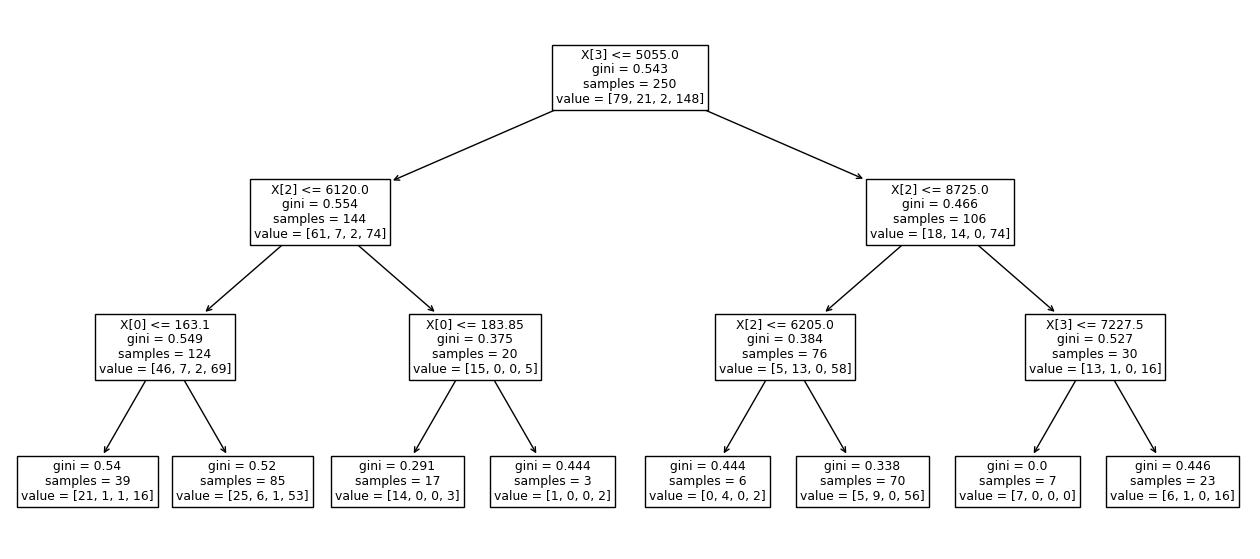

In [53]:
plt.figure(figsize=(16, 7))
clf_dt = DecisionTreeClassifier(max_depth=3)
clf_dt.fit(df_exam[X], df_exam['car_type'])

plot_tree(clf_dt)
plt.show()

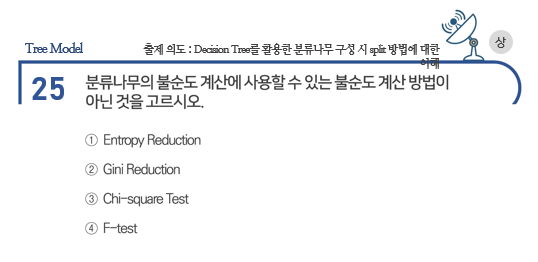

분류나무 학습시 각 노드에 사용할 속성을 정하는 기준에 해당하지 않는  것은?

**4**